In [1]:
import pandas as pd
import yaml
 
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")

df_demo = pd.read_csv(config['input_data']['file1'])

In [2]:
df_experiment = pd.read_csv(config['input_data']['file2'])
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [3]:
df_web_data_1 = pd.read_csv(config['input_data']['file3'])
df_web_data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [4]:
df_web_data_2 = pd.read_csv(config['input_data']['file4'])
df_web_data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_web_data = pd.concat([df_web_data_1, df_web_data_2], axis=0)
df_web_data 

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
started = df_web_data[df_web_data["process_step"] == "start"]["visitor_id"].nunique()
completed = df_web_data[df_web_data["process_step"] == "confirm"]["visitor_id"].nunique()

completion_rate = completed / started * 100

print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 65.29%


In [7]:
merged_df_demo_experiment = pd.merge(df_demo, df_experiment, on='client_id')
merged_df_demo_experiment

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [8]:
merged_df_demo_experiment_clean = merged_df_demo_experiment.dropna(subset=['Variation'])
merged_df_demo_experiment_clean

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [9]:
merged_df_demo_experiment_clean = merged_df_demo_experiment_clean.dropna(subset=['clnt_age'])
merged_df_demo_experiment_clean



,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [10]:
merged_df_demo_experiment_clean.to_csv("../data/clean/experiment_df.csv", index=False)

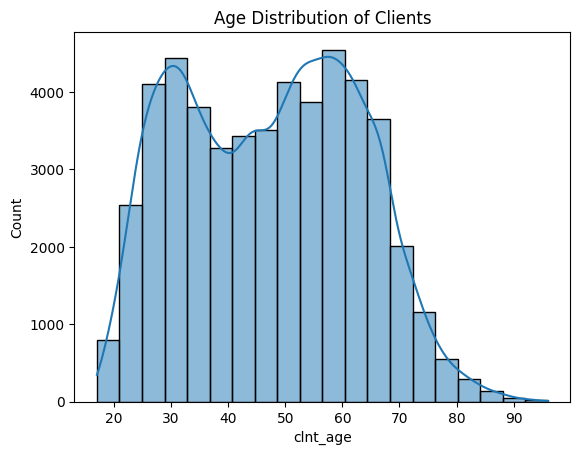

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

In [12]:
merged_df_demo_experiment_clean.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048700e+04,50487.000000,50487.000000,50487.000000,50487.000000,5.048700e+04,50487.000000,50487.000000
mean,5.006180e+06,12.031810,150.416365,47.319795,2.254580,1.495168e+05,3.093272,6.131856
std,2.877445e+06,6.860326,81.945403,15.518616,0.533675,3.020390e+05,2.188009,2.175441
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515688e+06,6.000000,82.000000,33.500000,2.000000,3.987718e+04,1.000000,4.000000
50%,5.025043e+06,11.000000,136.000000,48.000000,2.000000,6.573433e+04,3.000000,6.000000
75%,7.477922e+06,16.000000,192.000000,59.500000,2.000000,1.399583e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [13]:
# Overall
#The average client age on the test group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) and holds an average balance of 149,516.8 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 12.03 years or 150.41 months (maximum of 55 or 669 and minimum of 2 or 33).

In [14]:
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['Variation'] == "Test"]
merged_df_demo_experiment_clean_test = merged_df_demo_experiment_clean_test.reset_index(drop=True)
merged_df_demo_experiment_clean_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
2,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
3,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
4,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...
26956,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test
26957,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
26958,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
26959,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [15]:
merged_df_demo_experiment_clean_test.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.696100e+04,26961.000000,26961.000000,26961.000000,26961.000000,2.696100e+04,26961.000000,26961.000000
mean,4.999639e+06,11.982901,149.852899,47.163922,2.249917,1.489626e+05,3.061941,6.101851
std,2.877510e+06,6.844947,81.783390,15.514461,0.529335,3.073737e+05,2.190590,2.177119
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.516570e+06,6.000000,82.000000,33.500000,2.000000,3.972920e+04,1.000000,4.000000
50%,5.025928e+06,11.000000,134.000000,47.500000,2.000000,6.546836e+04,3.000000,6.000000
75%,7.470213e+06,15.000000,191.000000,59.500000,2.000000,1.394786e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [16]:
# Test Group
#The average client age on the test group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.25 accounts (minimum of 1 and maximum of 7) and holds an average balance of 148,962.6 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 11.98 years or 149.85 months (maximum of 55 or 669 and minimum of 2 or 33).

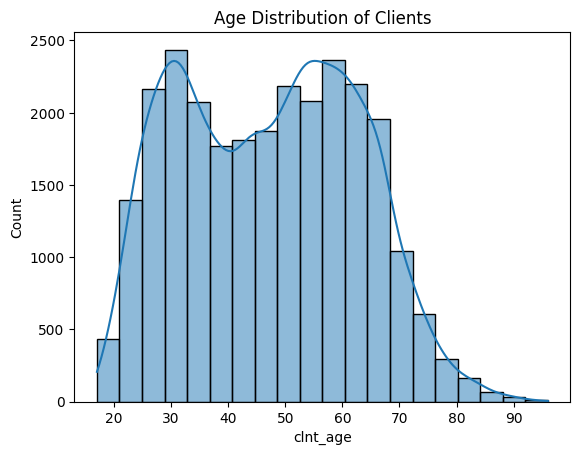

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean_test['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

In [18]:
merged_df_demo_experiment_clean_control = merged_df_demo_experiment_clean[merged_df_demo_experiment_clean['Variation'] == "Control"]
merged_df_demo_experiment_clean_control= merged_df_demo_experiment_clean_control.reset_index(drop=True)
merged_df_demo_experiment_clean_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
1,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
2,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
3,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
4,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
...,...,...,...,...,...,...,...,...,...,...
23521,6662941,7.0,84.0,36.0,F,2.0,83101.84,4.0,7.0,Control
23522,2787512,23.0,283.0,48.0,F,3.0,123618.60,1.0,4.0,Control
23523,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0,Control
23524,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control


In [19]:
merged_df_demo_experiment_clean_control.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,2.352600e+04,23526.000000,23526.000000,23526.000000,23526.000000,2.352600e+04,23526.000000,23526.000000
mean,5.013676e+06,12.087860,151.062102,47.498427,2.259925,1.501519e+05,3.129176,6.166242
std,2.877414e+06,6.877626,82.127663,15.521781,0.538568,2.958124e+05,2.184541,2.173053
min,1.028000e+03,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,2.515177e+06,6.000000,82.000000,33.500000,2.000000,4.012295e+04,1.000000,4.000000
50%,5.023832e+06,11.000000,137.000000,48.500000,2.000000,6.603145e+04,3.000000,6.000000
75%,7.483638e+06,16.000000,192.000000,60.000000,2.000000,1.406156e+05,5.000000,8.000000
max,9.998921e+06,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000


In [20]:
#Control group
#The average client age on the control group is 47 years old, the minimum is 17 and the maximum is 96. 
#The average client holds approximately 2.26 accounts (minimum of 1 and maximum of 7) and holds an average balance of 150,151.9 in all accounts (minimum of 23,789.44 and maximum of 16,320,040).
#In average the clients have been with Vanguard for 12.09 years or 151.06 months (maximum of 55 or 669 and minimum of 2 or 33). 

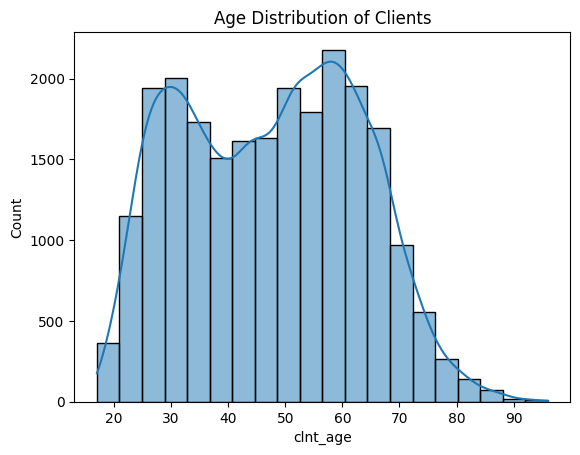

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df_demo_experiment_clean_control['clnt_age'], bins=20, kde=True)
plt.title("Age Distribution of Clients")
plt.show()

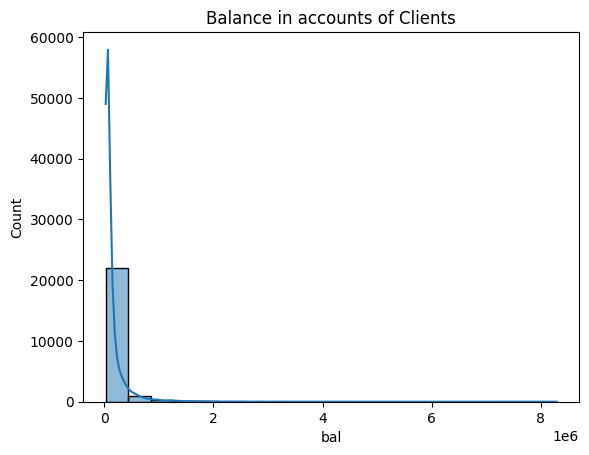

In [22]:
sns.histplot(merged_df_demo_experiment_clean_control['bal'], bins=20, kde=True)
plt.title("Balance in accounts of Clients")
plt.show()

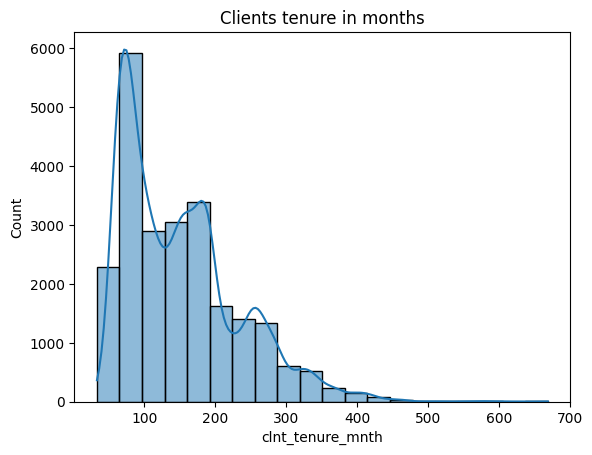

In [23]:
sns.histplot(merged_df_demo_experiment_clean_control['clnt_tenure_mnth'], bins=20, kde=True)
plt.title("Clients tenure in months")
plt.show()

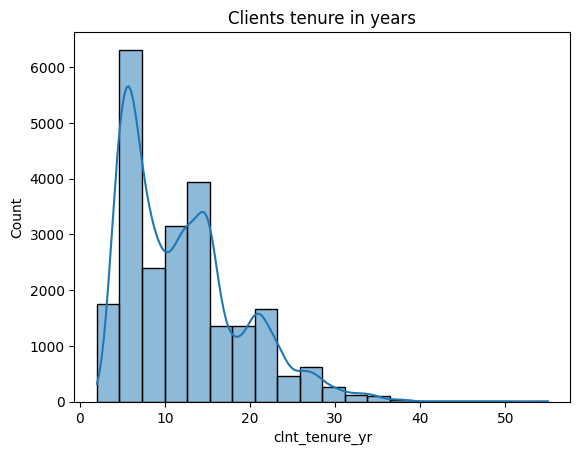

In [24]:
sns.histplot(merged_df_demo_experiment_clean_control['clnt_tenure_yr'], bins=20, kde=True)
plt.title("Clients tenure in years")
plt.show()

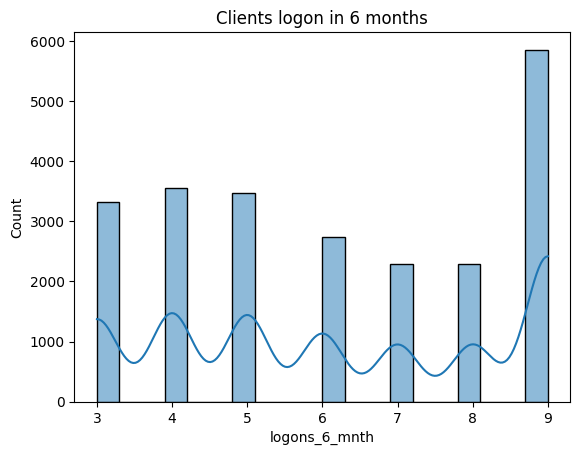

In [25]:
sns.histplot(merged_df_demo_experiment_clean_control['logons_6_mnth'], bins=20, kde=True)
plt.title("Clients logon in 6 months")
plt.show()

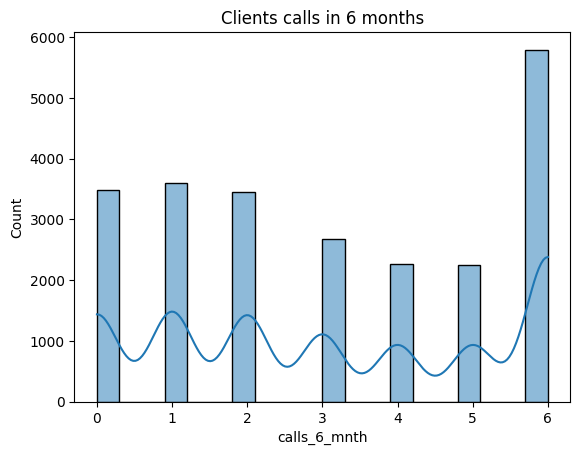

In [26]:
sns.histplot(merged_df_demo_experiment_clean_control['calls_6_mnth'], bins=20, kde=True)
plt.title("Clients calls in 6 months")
plt.show()

In [27]:
merged_df_experiment_web_data = pd.merge(df_experiment, df_web_data, on='client_id')
merged_df_experiment_web_data

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
449826,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09
449827,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37
449828,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05
449829,9895983,NaN,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00


In [28]:
merged_df_experiment_web_data_clean = merged_df_experiment_web_data.dropna(subset=['Variation'])
merged_df_experiment_web_data_clean

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [29]:
merged_df_experiment_web_data_clean["visitor_id"].value_counts()

visitor_id
857376424_12378092455    90
272742682_16716805486    81
780189529_68744403580    80
78799102_14329268381     80
819447509_47703321203    72
                         ..
333780246_47481742635     1
870271713_33104898489     1
164667088_86195003008     1
377484839_40771885547     1
995557836_86877000353     1
Name: count, Length: 56011, dtype: int64

In [30]:
merged_df_experiment_web_data_clean["process_step"].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)